<b>Task given:</b><br/>

Data Science Case Study – Version 1

Analyze the attached dataset ‘movie_metadata’ and identify the insights which can be generated from this data. The dataset has 28 variables which are explained in detail in the ‘variable description’ tab.

Key Questions to be answered:

1) What are your observations based on exploration of this data?<br/>
2) What is the recipe to make a blockbuster, profitable movie? Share your hypothesis and insights based on the data here.

<b>Approach:</b><br/>

I take "movie_score" as the target variable(in my further analysis) which describes the popularity of the movie.<br/>

This notebook contains Data Wrangling/Cleaning, EDA, Feature Engineering and model design.


<b>Data Cleaning</b>

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import timeit
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
# Load dataset to a dataframe.
data = pd.read_excel('/Users/harshini/Desktop/CaseStudy/movie_metadata.xls')
print("Shape of the data : {}".format(data.shape))

Shape of the data : (5043, 28)


In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Identify duplicates in the data.
dups = data.duplicated(subset='movie_title', keep=False)
print("Number of duplicates in the data : {}".format(sum(dups)))
# Remove duplicates from the data.
data = data.drop_duplicates(subset='movie_title',keep='first')
print("Shape of the data after removing duplicates : {}".format(data.shape))

Number of duplicates in the data : 245
Shape of the data after removing duplicates : (4917, 28)


In [5]:
# Identify null values.
data.isnull().sum().sort_values(ascending=False)

gross                        863
budget                       484
aspect_ratio                 326
content_rating               300
plot_keywords                152
title_year                   106
director_name                102
director_facebook_likes      102
num_critic_for_reviews        49
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_movie_link               0
movie_score                    0
cast_total_facebook_likes      0
dtype: int64

In [6]:
# Percentage of null values.
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

gross                        17.551352
budget                        9.843400
aspect_ratio                  6.630059
content_rating                6.101281
plot_keywords                 3.091316
title_year                    2.155786
director_name                 2.074436
director_facebook_likes       2.074436
num_critic_for_reviews        0.996543
actor_3_name                  0.467765
actor_3_facebook_likes        0.467765
num_user_for_reviews          0.427090
color                         0.386414
duration                      0.305064
facenumber_in_poster          0.264389
actor_2_name                  0.264389
actor_2_facebook_likes        0.264389
language                      0.244051
actor_1_name                  0.142363
actor_1_facebook_likes        0.142363
country                       0.101688
movie_facebook_likes          0.000000
genres                        0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_movie_link         

In [7]:
# Remove aspect_ratio and facenumber_in_poster columns as they are of less impact to the target variable.
data = data.drop(['aspect_ratio','facenumber_in_poster'],axis=1)

In [8]:
# Drop null values
data = data.dropna(subset=['gross','budget','content_rating','color','actor_2_name','actor_3_name','language','num_critic_for_reviews','plot_keywords'])

In [9]:
data.isnull().sum().sort_values(ascending=False)

movie_facebook_likes         0
movie_score                  0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
movie_movie_link             0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
color                        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3707 entries, 0 to 5042
Data columns (total 26 columns):
color                        3707 non-null object
director_name                3707 non-null object
num_critic_for_reviews       3707 non-null float64
duration                     3707 non-null float64
director_facebook_likes      3707 non-null float64
actor_3_facebook_likes       3707 non-null float64
actor_2_name                 3707 non-null object
actor_1_facebook_likes       3707 non-null float64
gross                        3707 non-null float64
genres                       3707 non-null object
actor_1_name                 3707 non-null object
movie_title                  3707 non-null object
num_voted_users              3707 non-null int64
cast_total_facebook_likes    3707 non-null int64
actor_3_name                 3707 non-null object
plot_keywords                3707 non-null object
movie_movie_link             3707 non-null object
num_user_for_reviews         3707 non-n

<b>Observation : </b><br/>
From the above, it is observed that there is a mismatch of datatypes for the following variables.<br/>
actor_1_facebook_likes<br/>
actor_1_facebook_likes<br/>
actor_1_facebook_likes<br/>
director_facebook_likes<br/>
num_critic_for_reviews<br/>
title_year<br/>
num_user_for_reviews<br/>

In [11]:
# Correct the datatypes of above variables.
data.actor_1_facebook_likes = data.actor_1_facebook_likes.astype(int)
data.actor_2_facebook_likes = data.actor_2_facebook_likes.astype(int)
data.actor_3_facebook_likes = data.actor_3_facebook_likes.astype(int)
data.director_facebook_likes = data.director_facebook_likes.astype(int)
data.num_critic_for_reviews = data.num_critic_for_reviews.astype(int)
data.title_year = data.title_year.astype(int)
data.num_user_for_reviews = data.num_user_for_reviews.astype(int)

<b>EDA and Insights

In [12]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3.707000e+03,3.707000e+03,3707.000000,3707.000000,3.707000e+03,3707.000000,3707.000000,3707.000000,3707.000000
mean,163.383868,109.985433,802.490154,747.942541,7621.248179,5.124570e+07,1.034775e+05,11300.782574,327.265174,4.199350e+07,2002.956299,1965.564068,6.460237,9069.776639
std,122.504414,22.670183,3069.916524,1838.570536,15564.918642,6.909605e+07,1.516797e+05,19045.883827,404.982377,1.081349e+08,9.875164,4489.341504,1.058068,21380.982127
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,4.800000e+01,0.000000,2.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000
25%,75.000000,95.000000,10.000000,190.000000,730.000000,7.438866e+06,1.817450e+04,1861.000000,105.000000,1.000000e+07,1999.000000,371.000000,5.900000,0.000000
50%,134.000000,106.000000,59.000000,432.000000,1000.000000,2.856393e+07,5.189200e+04,3950.000000,203.000000,2.500000e+07,2004.000000,670.000000,6.600000,204.000000
75%,220.000000,120.000000,226.000000,687.000000,12000.000000,6.587787e+07,1.247030e+05,16005.500000,390.000000,5.000000e+07,2010.000000,972.000000,7.200000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,349000.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3707 entries, 0 to 5042
Data columns (total 26 columns):
color                        3707 non-null object
director_name                3707 non-null object
num_critic_for_reviews       3707 non-null int64
duration                     3707 non-null float64
director_facebook_likes      3707 non-null int64
actor_3_facebook_likes       3707 non-null int64
actor_2_name                 3707 non-null object
actor_1_facebook_likes       3707 non-null int64
gross                        3707 non-null float64
genres                       3707 non-null object
actor_1_name                 3707 non-null object
movie_title                  3707 non-null object
num_voted_users              3707 non-null int64
cast_total_facebook_likes    3707 non-null int64
actor_3_name                 3707 non-null object
plot_keywords                3707 non-null object
movie_movie_link             3707 non-null object
num_user_for_reviews         3707 non-null int6

<b>Scatterplots for joint relationships and histograms for univariate distributions:

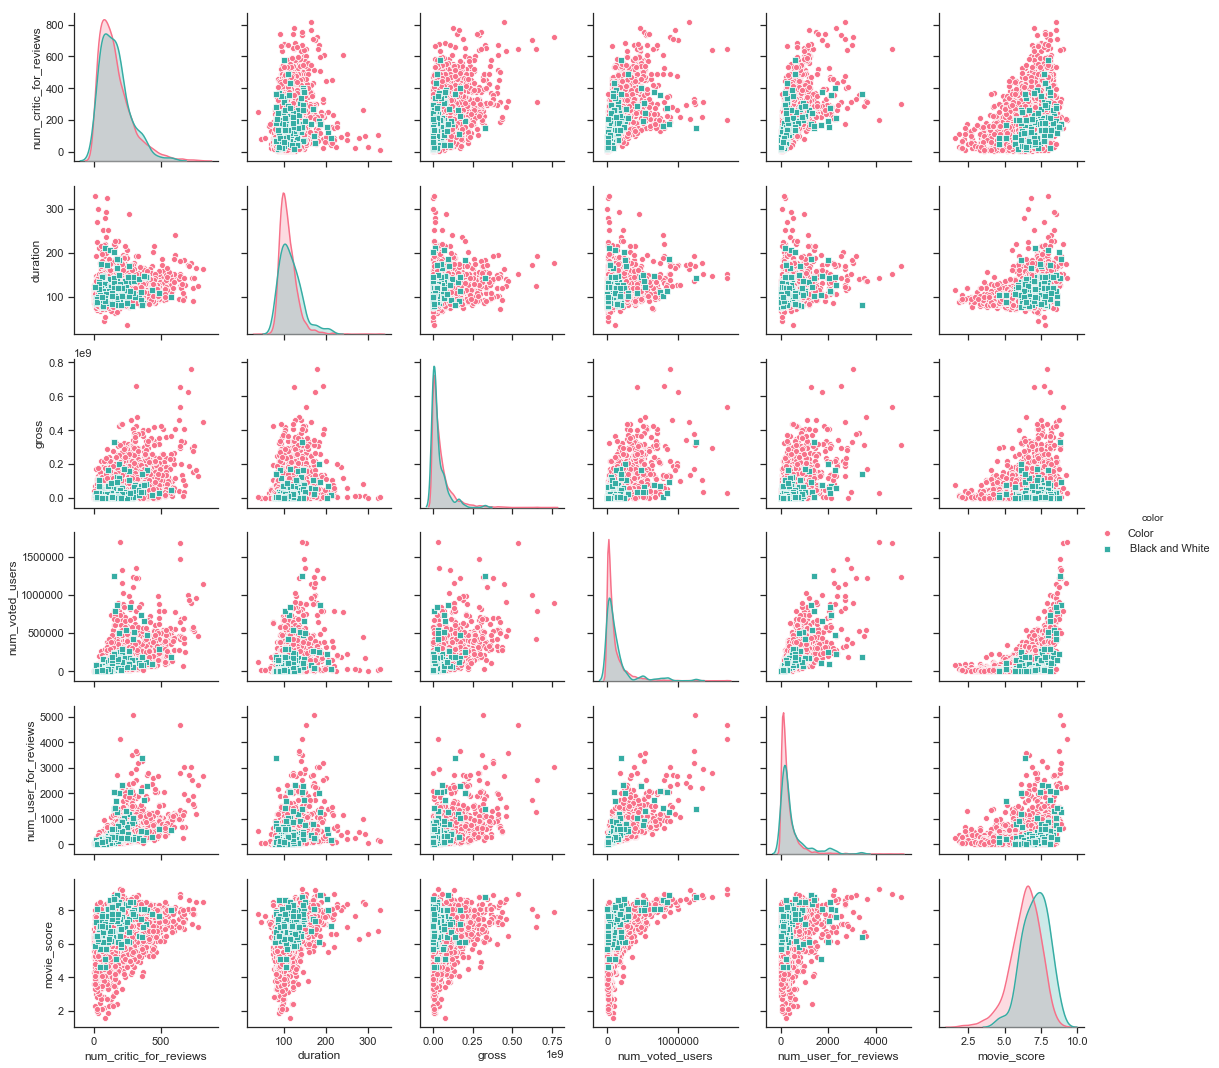

In [14]:
sns.set(style="ticks", color_codes=True)
num_data = data[['num_critic_for_reviews','duration','gross','num_voted_users','num_user_for_reviews','color','movie_score']]
g = sns.pairplot(num_data,hue='color',markers=["o", "s"],palette="husl")

<b>15 movies with lowest and highest gross earnings

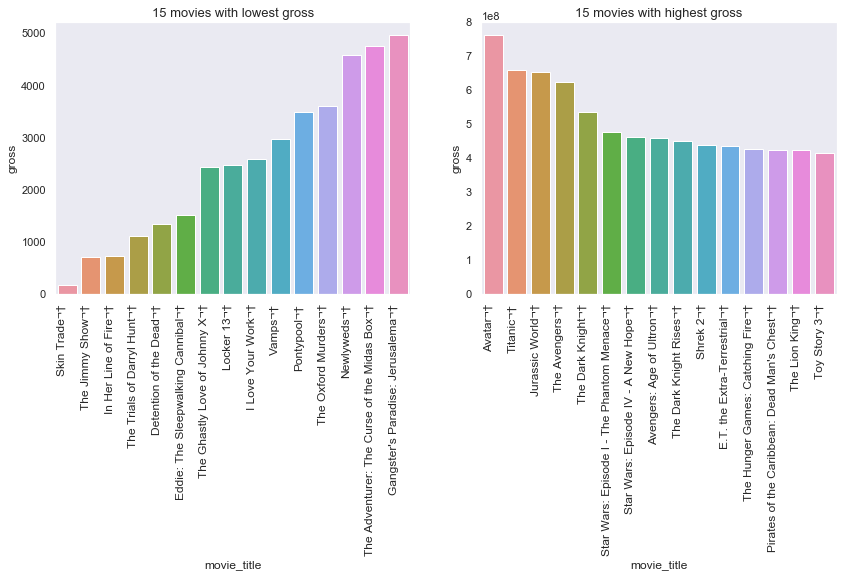

In [15]:
large_gross = data.groupby('movie_title').sum().nlargest(15,'gross').reset_index()
small_gross = data.groupby('movie_title').sum().nsmallest(15,'gross').reset_index()

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=small_gross,x=small_gross.movie_title,y=small_gross['gross'])
plot1.set_title("15 movies with lowest gross",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot1 = sns.barplot(data=large_gross,x=large_gross.movie_title,y=large_gross['gross'])
plot1.set_title("15 movies with highest gross",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.show()

<b>Genres of the top 5 highest rated movies

In [16]:
data.nlargest(5,'movie_score').reset_index()[['genres','movie_title']]

,genres,movie_title
0,Crime|Drama,The Shawshank Redemption¬†
1,Crime|Drama,The Godfather¬†
2,Action|Crime|Drama|Thriller,The Dark Knight¬†
3,Crime|Drama,The Godfather: Part II¬†
4,Action|Adventure|Drama|Fantasy,The Lord of the Rings: The Return of the King¬†


<b>Univariate distributions

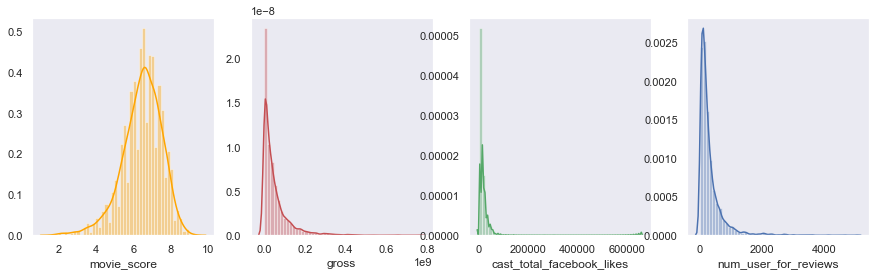

In [17]:
dims = (15,4)
fig, axs = plt.subplots(ncols=4,figsize=dims)
sns.distplot(data.movie_score,ax=axs[0],color='orange')
sns.distplot(data.gross,ax=axs[1],color='r')
sns.distplot(data.cast_total_facebook_likes,ax=axs[2],color='g')
sns.distplot(data.num_user_for_reviews,ax=axs[3])
plt.show()

<b>Gross earnings accross each content rating

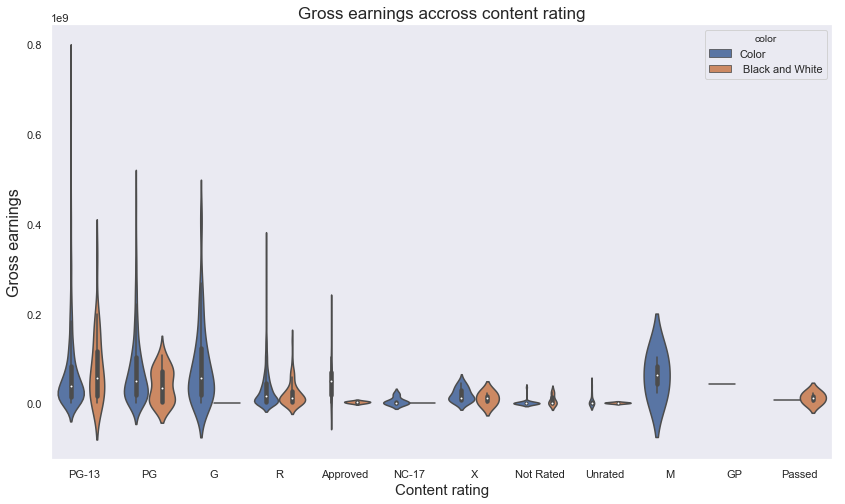

In [18]:
plt.figure(figsize=(14,8))
plot = sns.violinplot(data=data,x=data.content_rating,y=data['gross'],hue='color')
plot.set_title("Gross earnings accross content rating",fontsize=17)
plt.xlabel("Content rating",fontsize=15)
plt.ylabel("Gross earnings",fontsize=16)
plt.show()

<b>Top 20 successful directors

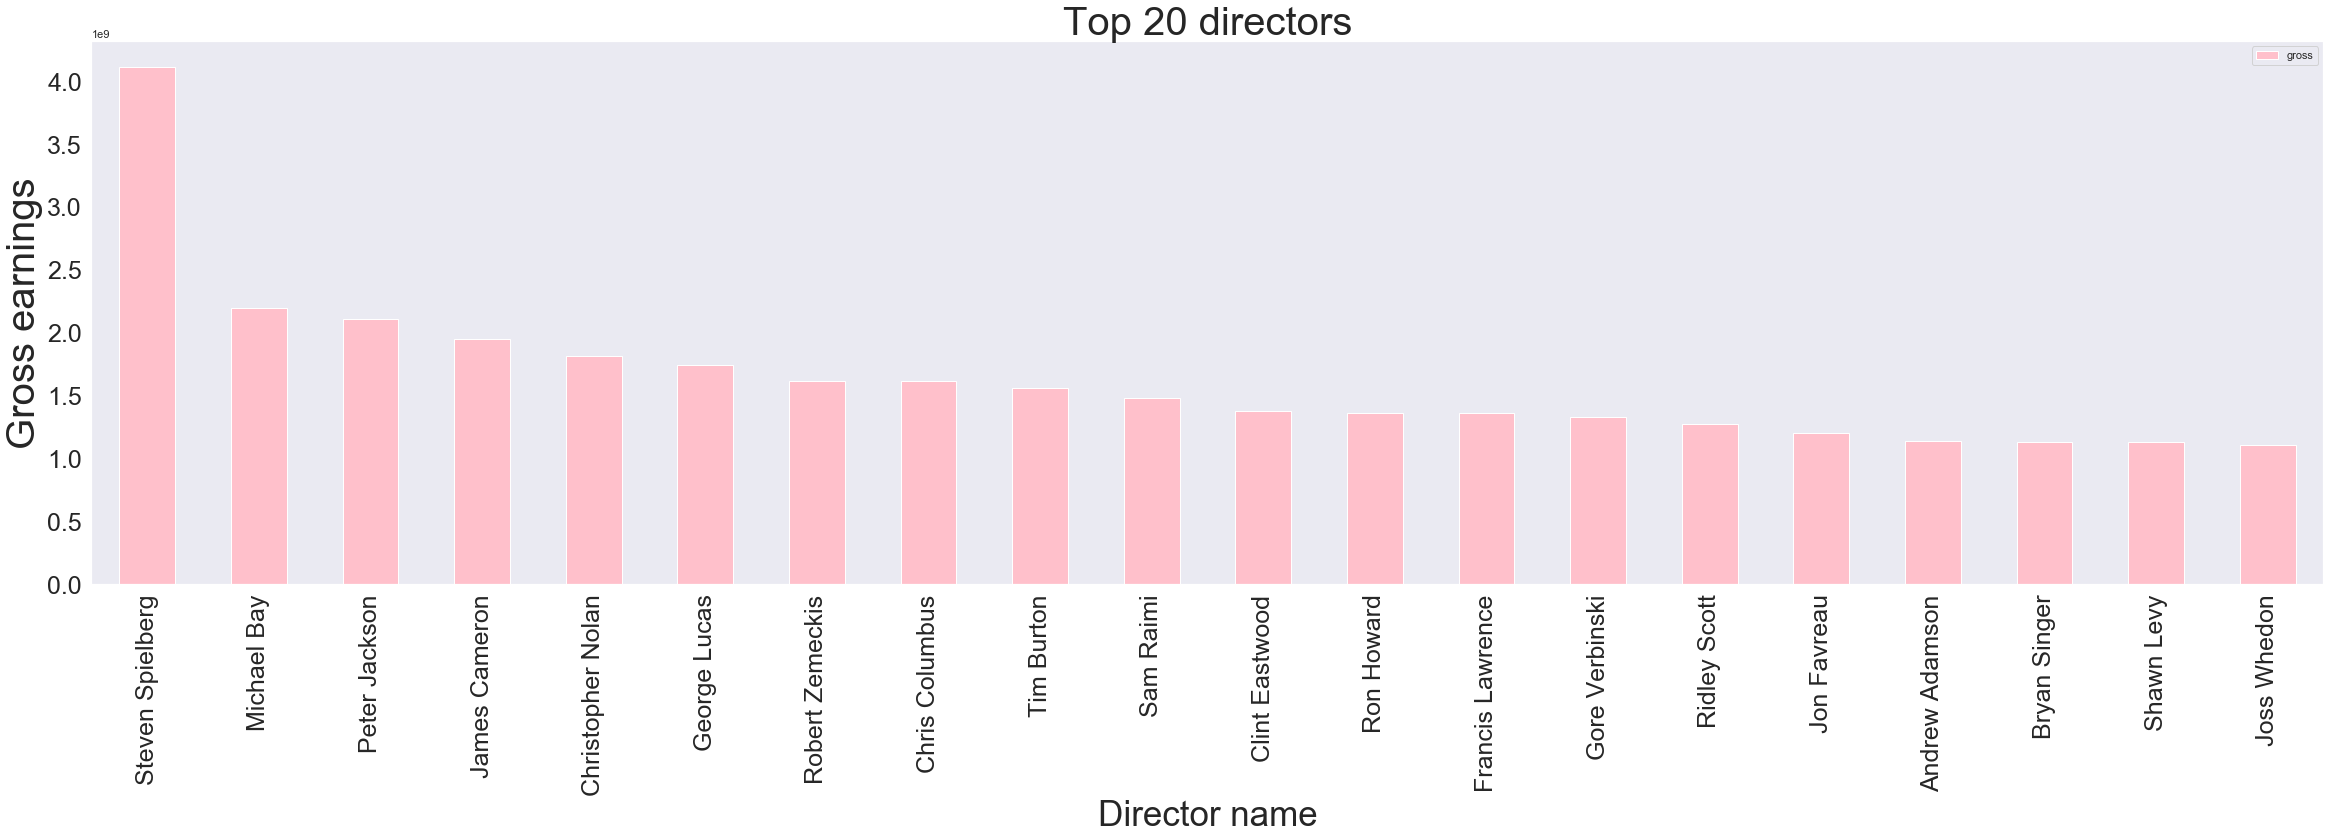

In [19]:
data1 = data[['director_name','gross']].groupby(['director_name']).sum()
data2 = data1.sort_values(by='gross',ascending=False).head(20)
data2.plot(kind='bar', figsize=(40,10), fontsize=25,color='pink')
plt.title("Top 20 directors",fontsize=40)
plt.xlabel("Director name",fontsize=35)
plt.ylabel("Gross earnings",fontsize=40)
plt.show()

<b>10 movies with lowest and highest movie scores

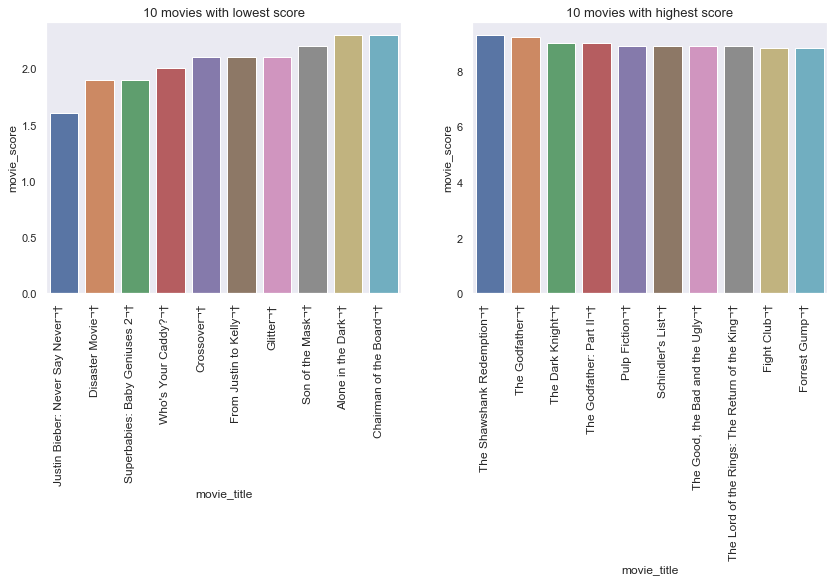

In [20]:
large_score = data.groupby('movie_title').sum().nlargest(10,'movie_score').reset_index()
small_score = data.groupby('movie_title').sum().nsmallest(10,'movie_score').reset_index()

plt.figure(figsize=(14,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=small_score,x=small_score.movie_title,y=small_score['movie_score'])
plot1.set_title("10 movies with lowest score",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.subplot(1,2,2)
plot1 = sns.barplot(data=large_score,x=large_score.movie_title,y=large_score['movie_score'])
plot1.set_title("10 movies with highest score",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)

plt.show()

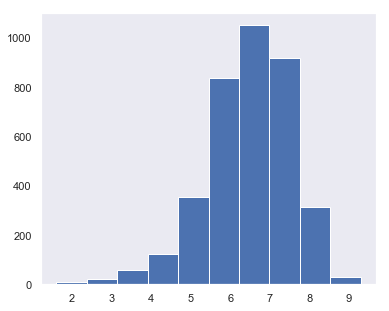

In [21]:
# Identify the distribution of the target variable.
plt.figure(figsize=(6,5))
plt.hist(data['movie_score'])
plt.show()

<b>Observation:</b><br/>
From the above, it is clear that the variable movie_score is slightly left skewed. Many machine learning models perform well when the target variable is normally distributed. Hence, let us convert it to normal distribution using boxcox transformation.

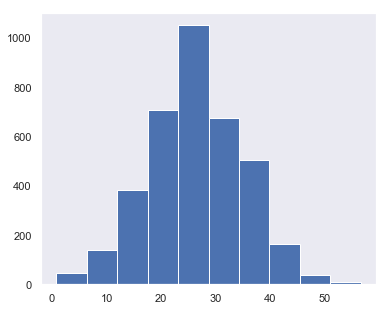

In [22]:
# Convert the target variable(movie_score) to normal distribution.
from scipy.stats import boxcox
boxcox_movie_score,_ = boxcox(data['movie_score'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_movie_score)
plt.show()

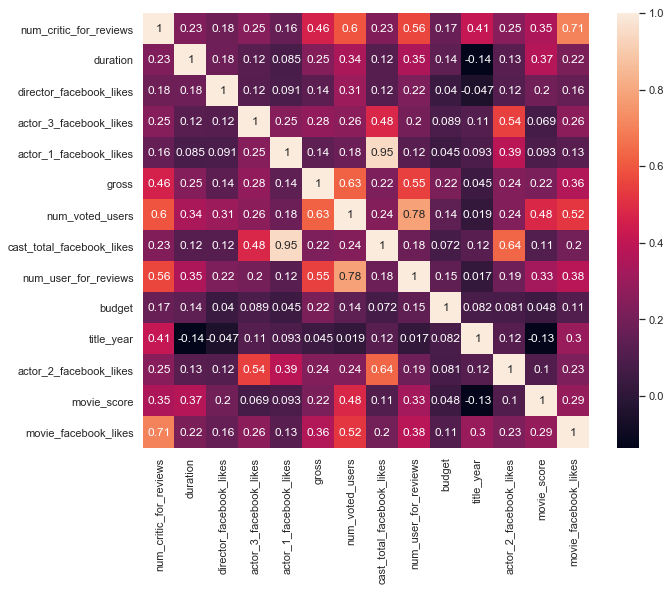

In [23]:
# Visualize correlation between independant variables and the target variable using a heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [24]:
# Correlation factors for 'movie_score'.
data.corr()['movie_score'].sort_values(ascending=False)

movie_score                  1.000000
num_voted_users              0.481434
duration                     0.368261
num_critic_for_reviews       0.352121
num_user_for_reviews         0.327721
movie_facebook_likes         0.285850
gross                        0.217149
director_facebook_likes      0.195121
cast_total_facebook_likes    0.106661
actor_2_facebook_likes       0.101768
actor_1_facebook_likes       0.093358
actor_3_facebook_likes       0.069267
budget                       0.047704
title_year                  -0.130080
Name: movie_score, dtype: float64

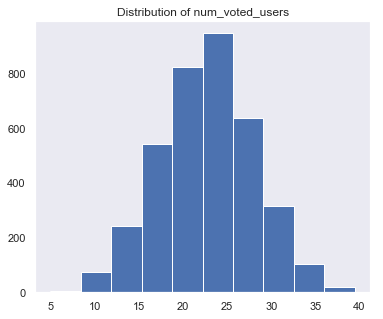

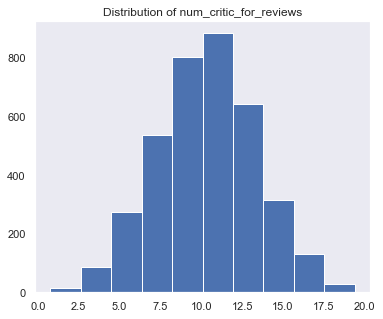

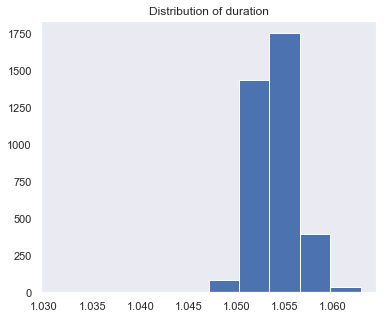

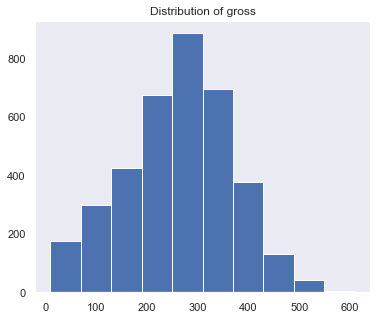

In [25]:
# Transform to normal distribution using boxcox transformation.
boxcox_num_voted_users,_ = boxcox(data['num_voted_users'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_num_voted_users)
plt.title("Distribution of num_voted_users")
plt.show()

boxcox_num_critic_for_reviews,_ = boxcox(data['num_critic_for_reviews'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_num_critic_for_reviews)
plt.title("Distribution of num_critic_for_reviews")
plt.show()

boxcox_duration,_ = boxcox(data['duration'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_duration)
plt.title("Distribution of duration")
plt.show()

boxcox_gross,_ = boxcox(data['gross'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_gross)
plt.title("Distribution of gross")
plt.show()

In [26]:
# Add new variables(normally distributed) to the data frame.
data['boxcox_gross'] = boxcox_gross
data['boxcox_num_voted_users'] = boxcox_num_voted_users
data['boxcox_num_critic_for_reviews'] = boxcox_num_critic_for_reviews
data['boxcox_duration'] = boxcox_duration
data['boxcox_movie_score'] = boxcox_movie_score

<b>Decision Tree

In [27]:
# Decision Tree.

from sklearn import tree
from sklearn.model_selection import train_test_split
  
#X = data[['boxcox_num_voted_users','boxcox_gross','num_user_for_reviews','boxcox_num_critic_for_reviews','movie_facebook_likes','actor_3_facebook_likes','boxcox_duration','actor_2_facebook_likes','cast_total_facebook_likes','budget','movie_score','actor_1_facebook_likes','director_facebook_likes']]
X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

model = tree.DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse_dct = rmse(y_test, y_pred)
print("Root mean squared error of the prediction is: {}".format(rmse_dct))

Root mean squared error of the prediction is: 1.0817027607127998


<b>KNN

In [28]:
# KNN Regression model.

from sklearn import neighbors

# X = data[['num_voted_users','num_critic_for_reviews','movie_facebook_likes','cast_total_facebook_likes','duration']]
X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

rmse_knn = rmse(y_test, pred_test)
#print("RMSE for the prediction of trained data is",rmse(y_train, pred_train))
print("Root mean squared error of the prediction is: {}".format(rmse_knn))

Root mean squared error of the prediction is: 1.1177324706792684


<b>Linear model

In [29]:
# Linear model.

from sklearn import linear_model

#X = data[['num_voted_users','num_critic_for_reviews','movie_facebook_likes','cast_total_facebook_likes','duration']]

X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

lireg = linear_model.LinearRegression()
lireg.fit(X_train,y_train)
pred_test = lireg.predict(X_test)

rmse_lireg = rmse(y_test, pred_test)
print("Root mean squared error of the prediction is: {}".format(rmse_lireg))

Root mean squared error of the prediction is: 0.9516716538834786


<b>SVR

In [30]:
# SVR
from sklearn.svm import SVR

#X = data[['num_voted_users','num_critic_for_reviews','movie_facebook_likes','cast_total_facebook_likes','duration']]
X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

svr = SVR()
svr.fit(X_train,y_train)
pred = svr.predict(X_test)

rmse_svr = rmse(y_test, pred)
print("Root mean squared error of the prediction is: {}".format(rmse_svr))

Root mean squared error of the prediction is: 1.1237030176622917


<b>OLS

In [31]:
import statsmodels.api as sm

#X = data[['num_voted_users','num_critic_for_reviews','movie_facebook_likes','cast_total_facebook_likes','duration']]
X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)
X_train = sm.add_constant(X_train)

model4 = sm.OLS(y_train, X_train).fit()
model4.summary()

# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = model4.predict(X_test)


rmse_ols = rmse(y_test, y_preds)
print("Root mean squared error of the prediction is: {}".format(rmse_ols))

Root mean squared error of the prediction is: 0.9516713877991713


<b>Ensemble

In [32]:
from sklearn import ensemble

#X = data[['num_voted_users','num_critic_for_reviews','movie_facebook_likes','cast_total_facebook_likes','duration']]
X = data[['boxcox_num_voted_users','boxcox_duration','boxcox_num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes','gross','director_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes']]
Y = data['movie_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

n_trees=400
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)

pred=model.predict(X_test)

rmse_grad_boost = rmse(y_test, pred)
print("Root mean squared error of the prediction is: {}".format(rmse_grad_boost))

Root mean squared error of the prediction is: 0.7806942585923022


<b>Which algorithm performs better?

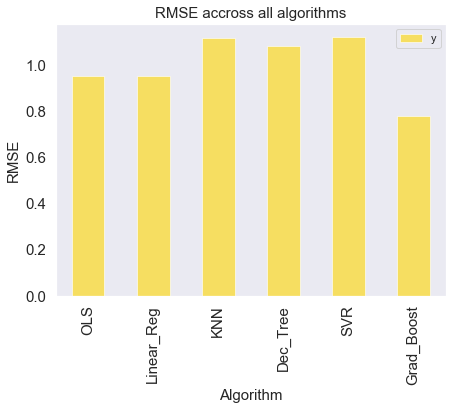

In [33]:
y = [rmse_ols,rmse_lireg,rmse_knn,rmse_dct,rmse_svr,rmse_grad_boost]
x = ['OLS','Linear_Reg','KNN','Dec_Tree','Support Vector','Grad boost']

df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.index = ['OLS','Linear_Reg','KNN','Dec_Tree','SVR','Grad_Boost']
df.plot(kind='bar', figsize=(7,5), fontsize=15,color='gold',alpha=0.60)
plt.title("RMSE accross all algorithms",fontsize=15)
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("RMSE",fontsize=15)
plt.show()

<b>Observation : </b><br/>
From the above, it is observed that Gradient boost algorithm has less RMSE compared to all. Hence, it the best among all algorithms we have tried.

<b>Experimental Design : </b>

<b>Hypothesis: Increasing number of user reviews for a movie would increase the movie_score.

<b>Sample:500 people will be randomly selected to give movie reviews. Also 10 movies should be randomly selected from movie_titles and split into 2 groups of 5 each.  

<b>Treatment: Movies from Group1 should be given to 500 users asking to review. Movies from Group2 should NOT be sent for any review.

<b>Rollout & Evaluation Plan

<b>Impact Window: The first month of the movie release.

<b>Metrics: Average movie score for each group.

<b>Success Criteria: If movie_score for Group1 is atleast 25% greater than that of Group2, the null hypothesis "increasing number of user reviews would not increase the movie_score" has no impact and can be rejected.

In [34]:
data.corr()['movie_score'].sort_values(ascending=False)

movie_score                      1.000000
boxcox_movie_score               0.987325
num_voted_users                  0.481434
boxcox_num_voted_users           0.472661
boxcox_duration                  0.369912
duration                         0.368261
boxcox_num_critic_for_reviews    0.356369
num_critic_for_reviews           0.352121
num_user_for_reviews             0.327721
movie_facebook_likes             0.285850
gross                            0.217149
director_facebook_likes          0.195121
boxcox_gross                     0.141755
cast_total_facebook_likes        0.106661
actor_2_facebook_likes           0.101768
actor_1_facebook_likes           0.093358
actor_3_facebook_likes           0.069267
budget                           0.047704
title_year                      -0.130080
Name: movie_score, dtype: float64

<b>Conclusion:</b><br/>
From the above correlation factors, it is clear that num_voted_users, duration, num_critic_for_reviews, num_user_for_reviews and movie_facebook_likes play key role in determining the success of a movie. Let us observe correlation among these variables.

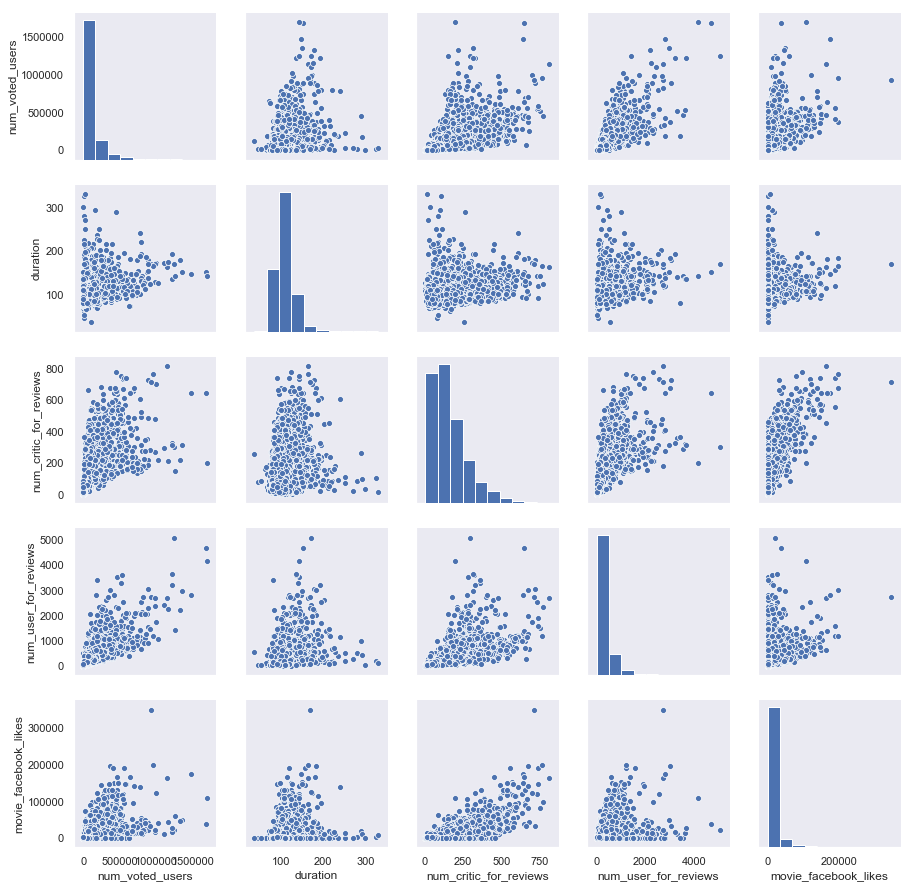

In [35]:
#key_factors = ['movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes']
new_data = data[['num_voted_users','duration','num_critic_for_reviews','num_user_for_reviews','movie_facebook_likes']]
g = sns.pairplot(new_data)

From the above correlation scatter plots, it is observed that num_critic_for_reviews and movie_facebook_likes are correlated with each other. All the features correlated to the target variable should be independent and not correlated among themselves. Hence, we can ignore movie_facebook_likes which has less correlation factor than num_critic_for_reviews.<br/>

From all the above analysis, we can conclude that num_voted_users, duration, num_critic_for_reviews and num_user_for_reviews play vital role in determining the success of a movie. i.e the recipe of a blockbuster/successful movie would contain all these factors.